# Plotting all

[      0     100     200 ... 2999700 2999800 2999900]
[2000.  2001.  2000.5 ... 2034.5 2033.  2033.5]


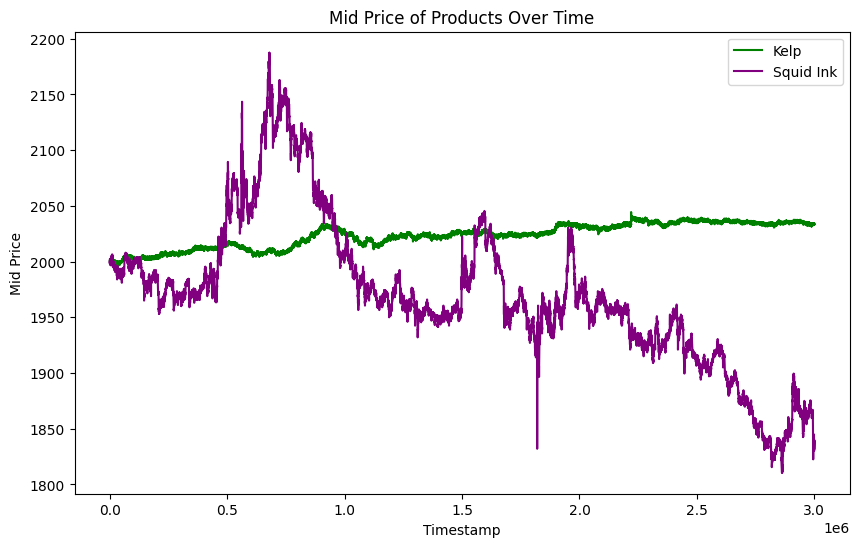

In [13]:
import pandas as pd
import numpy as np

prices1 = pd.read_csv(r'./round-1-island-data-bottle/round-1-island-data-bottle/prices_round_1_day_-2.csv',sep=';')
prices2 = pd.read_csv(r'./round-1-island-data-bottle/round-1-island-data-bottle/prices_round_1_day_-1.csv',sep=';')
prices3 = pd.read_csv(r'./round-1-island-data-bottle/round-1-island-data-bottle/prices_round_1_day_0.csv',sep=';')

import matplotlib.pyplot as plt
# Concatenate all dataframes
all_prices = pd.concat([prices1, prices2, prices3])
all_prices['timestamp'] = all_prices['timestamp']+(1000000*(all_prices['day']+2))

kelp_data = all_prices[all_prices['product'] == 'KELP']
kelp_x = kelp_data['timestamp'].to_numpy()
kelp_y = kelp_data['mid_price'].to_numpy()
kelp_z1 = kelp_data['bid_price_1'].to_numpy()
kelp_z2 = kelp_data['bid_price_2'].to_numpy()
kelp_z3 = kelp_data['bid_price_3'].to_numpy()
kelp_w1 = kelp_data['ask_price_1'].to_numpy()
kelp_w2 = kelp_data['ask_price_2'].to_numpy()
kelp_w3 = kelp_data['ask_price_3'].to_numpy()
print(kelp_x)
print(kelp_y)

resin_data = all_prices[all_prices['product'] == 'RAINFOREST_RESIN']
resin_x = resin_data['timestamp'].to_numpy()
resin_y = resin_data['mid_price'].to_numpy()
resin_z1 = resin_data['bid_price_1'].to_numpy()
resin_z2 = resin_data['bid_price_2'].to_numpy()
resin_z3 = resin_data['bid_price_3'].to_numpy()
resin_w1 = resin_data['ask_price_1'].to_numpy()
resin_w2 = resin_data['ask_price_2'].to_numpy()
resin_w3 = resin_data['ask_price_3'].to_numpy()

squid_ink_data = all_prices[all_prices['product'] == 'SQUID_INK']
squid_ink_x = squid_ink_data['timestamp'].to_numpy()
squid_ink_y = squid_ink_data['mid_price'].to_numpy()
squid_ink_z1 = squid_ink_data['bid_price_1'].to_numpy()
squid_ink_z2 = squid_ink_data['bid_price_2'].to_numpy()
squid_ink_z3 = squid_ink_data['bid_price_3'].to_numpy()
squid_ink_w1 = squid_ink_data['ask_price_1'].to_numpy()
squid_ink_w2 = squid_ink_data['ask_price_2'].to_numpy()
squid_ink_w3 = squid_ink_data['ask_price_3'].to_numpy()



plt.figure(figsize=(10, 6))
plt.plot(kelp_x, kelp_y, label='Kelp', color='green')
# plt.plot(resin_x, resin_y, label='Rainforest Resin', color='blue')
plt.plot(squid_ink_x, squid_ink_y, label='Squid Ink', color='purple')
plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.title('Mid Price of Products Over Time')
plt.legend()
plt.show()

# print(all_prices.head(6))


In [14]:
# N_fft = 2048
# x = squid_ink_y

# X_fft = np.fft.fft(x, N_fft)
# freq_fft = np.fft.fftfreq(N_fft, d=1)


# omega = np.linspace(-np.pi, np.pi, N_fft)
# X_dtft = np.array([sum(x[n] * np.exp(-1j * w * n) for n in range(len(x))) for w in omega])


# plt.figure(figsize=(12, 6))


# plt.subplot(2, 2, 1)
# plt.plot(omega, np.abs(X_dtft))
# plt.title("DTFT Magnitude")
# plt.xlabel("ω (radians/sample)")
# plt.ylabel("|X(e^{jω})|")
# plt.grid()


# plt.subplot(2, 2, 2)
# plt.plot(omega, np.angle(X_dtft))
# plt.title("DTFT Phase")
# plt.xlabel("ω (radians/sample)")
# plt.ylabel("∠X(e^{jω})")
# plt.grid()


# plt.subplot(2, 2, 3)
# plt.plot(freq_fft, np.abs(X_fft))
# plt.title("FFT Magnitude")
# plt.xlabel("Normalized Frequency")
# plt.ylabel("|X[k]|")
# plt.grid()


# plt.subplot(2, 2, 4)
# plt.plot(freq_fft, np.angle(X_fft))
# plt.title("FFT Phase")
# plt.xlabel("Normalized Frequency")
# plt.ylabel("∠X[k]")
# plt.grid()

# plt.tight_layout()
# plt.show()


In [15]:
# plt.plot(omega, np.abs(X_dtft))
plt.figure(figsize=(60, 40))  # Adjust the figure size to magnify the image
plt.plot(omega, np.abs(X_dtft))
plt.title("Magnified DTFT Magnitude")
plt.xlabel("ω (radians/sample)")
plt.ylabel("|X(e^{jω})|")
plt.grid()
plt.show()

NameError: name 'omega' is not defined

<Figure size 6000x4000 with 0 Axes>

# Polynomial regression

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

X, y = [], []








n = 7                                 ################################################## MAY CHANGE THIS

degree = 3                            ################################################## MAY CHANGE THIS


data = squid_ink_y
for i in range(n,len(data)):
    X.append(data[i-n:i])
    y.append(data[i])

X = np.array(X)
y = np.array(y)

split_index = int(0.5 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Train the autoregressive model
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit your model
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

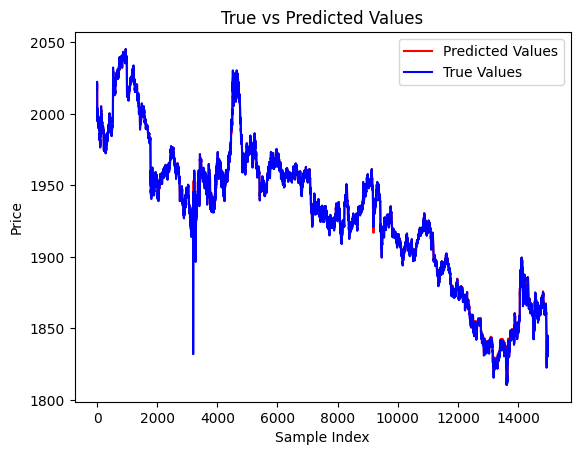

(0.7202027229620934, -0.5936142752168633, 0.5088708892379177, -0.5082676826299879, 0.4639642198438167, 0.435871169142668, -0.394296885687019, 0.3664161731467015, -0.35297065070996425, -0.33066729858376653, -0.30737611618016203, -0.29156263370672636, 0.28954322872379035, -0.27970276573232306, 0.2017921011370662) ([1, 0, 0, 0, 0, 1, 0], [0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 1], [0, 1, 0, 1, 0, 0, 0], [0, 0, 0, 0, 1, 1, 0], [1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 1, 0, 0], [0, 0, 1, 1, 0, 0, 0], [0, 0, 0, 0, 2, 0, 0], [0, 1, 0, 0, 0, 1, 0], [1, 1, 0, 0, 0, 0, 0], [0, 0, 1, 0, 1, 0, 0], [1, 0, 0, 1, 0, 0, 0], [0, 0, 0, 2, 0, 0, 0])
18


In [ ]:
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

threshold = 9
with open("haha.txt", "w") as f:
    for i in range(len(X_test)):
        f.write(f"\ninitial_X_test[i][j]:{X_test[i][6]}\n")
        for j in range(len(X_test[i])):
            if 7*i+j < 10: continue
            sum = 0
            for k in range(j):
                sum += X_test[i][k]
            for k in range(max(0,7-(10-j)), 7):
                sum += X_test[i-1][k]
            for k in range(14-(10-j), 7):
                sum += X_test[i-2][k]
            avg = sum / 10
            f.write(f"avg:{avg}\n")
            # f.write(f"initial_X_test[i][j]:{X_test[i][j]}\n")
            if abs(X_test[i][j]-avg) > threshold:
                X_test[i][j] = avg + threshold*(X_test[i][j]-avg)/abs(X_test[i][j]-avg)
        f.write(f"final_X_test[i][j]:{X_test[i][6]}\n")
        


# Predict on test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Write outputs to a file
with open("output.txt", "w") as f:
    f.write(f"Mean Squared Error: {mse}\n")
    f.write("\n")
    f.write("Model Coefficients:\n")
    for coef in model.named_steps['linearregression'].coef_:
        f.write(f"{coef}\n")
    for i in range(100):
        f.write("\n")
    f.write(f"Model Intercept: {model.named_steps['linearregression'].intercept_.tolist()}\n")
    for i in range(100):
        f.write("\n")
    f.write("Model Polynomial Features:\n")
    for powers in model.named_steps['polynomialfeatures'].powers_:
        f.write(f"{powers}\n")

    

    f.write(f"{sorted(y_pred.tolist())}")
    # f.write(f"{sorted(y_test.tolist())}")


# Plotting
plt.plot(y_pred, color='red', label='Predicted Values')
plt.plot(y_test, color='blue', label='True Values')
plt.title('True vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()
# print(y_test)
# print(y_pred)

sorted_coefs,sorted_powers=zip(*sorted(zip(model.named_steps['linearregression'].coef_.tolist(), model.named_steps['polynomialfeatures'].powers_.tolist()),key=lambda pair: abs(pair[0]),reverse=True))
print(sorted_coefs[:15],sorted_powers[:15])
c = 0
for i in range(len(sorted_coefs)):
    if abs(sorted_coefs[i]) >0.15 :
        c += 1

print(c)

# Iterating for threshold

In [18]:
import copy
min_t = float('inf')
for threshold in range(0, 100):
    X_testt = copy.deepcopy(X_test)
    for i in range(len(X_testt)):
        # f.write(f"\ninitial_X_testt[i][j]:{X_testt[i][6]}\n")
        for j in range(len(X_testt[i])):
            if 7*i+j < 10: continue
            sum = 0
            for k in range(j):
                sum += X_testt[i][k]
            for k in range(max(0,7-(10-j)), 7):
                sum += X_testt[i-1][k]
            for k in range(14-(10-j), 7):
                sum += X_testt[i-2][k]
            avg = sum / 10
            # f.write(f"avg:{avg}\n")
            # f.write(f"initial_X_testt[i][j]:{X_testt[i][j]}\n")
            if abs(X_testt[i][j]-avg) > threshold:
                X_testt[i][j] = avg + threshold*(X_testt[i][j]-avg)/abs(X_testt[i][j]-avg)
        # f.write(f"final_X_testt[i][j]:{X_testt[i][6]}\n")
            


    # Predict on test data
    y_pred = model.predict(X_testt)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    
    if mse < min_t:
        min_t = mse
        print(threshold)
        print(mse)

0
8038.268178712426
1
8.684582741287159
2
5.724290497932213
3
4.665812969931545
4
4.156785792420838
5
3.8730847071619996
6
3.7027324175302714
7
3.6042691666717146
8
3.556585046524646
9
3.5386634984950343
